<a href="https://colab.research.google.com/github/gguillaux/ml_python/blob/master/fiap_modelos_de_ia_e_ml_exercicio_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício #2.1
Utilizando o arquivo Usuarios-TempoMedioQuantidade.csv, que é uma
amostra do tempo de utilização dos usuários em um determinado
sistema, faça a clusterização utilizando k-means e DBSCAN
**bold text**
1. O que representam os clusters gerados?
2. Qual é a melhor quantidade de Clusters?
3. Qual é a melhor técnica (k-means ou DBSCAN) a ser utilizada nessa
clusterização

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
users = pd.read_csv('./drive/My Drive/fiap/datasets/Usuarios-TempoMedioQuantidade.csv',
            sep=';',
            encoding='latin1')

In [3]:
users.head()

,NomeUsuario,Login,Email,NomeEquipe,Quantidade,TempoMedio
0,dadostab1,dadostab1,dadostab1@dadospesquisa.com.br,Equipe Dados Pesquisa,1498,0
1,axistab2,axistab2,axistab2@axiscriativa.com.br,Equipe Axis Criativa,461,75
2,axistab1,axistab1,axistab1@axiscriativa.com.br,Equipe Axis Criativa,445,7
3,planocdetab1,planocdetab1,planocdetab1@planocde.com.br,Equipe PlanoCDE,423,140
4,Usuario11,usuario11,usuario11@marketnnova.com,Equipe Marketnnova,351,22


In [0]:
plt.style.use('dark_background')

In [0]:
def plot_scatter(x, y, c=None, xl='', yl='', title=''):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 7)
    ax.scatter(x,
               y,
               c=c)
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    ax.set_title(title)
    plt.show()

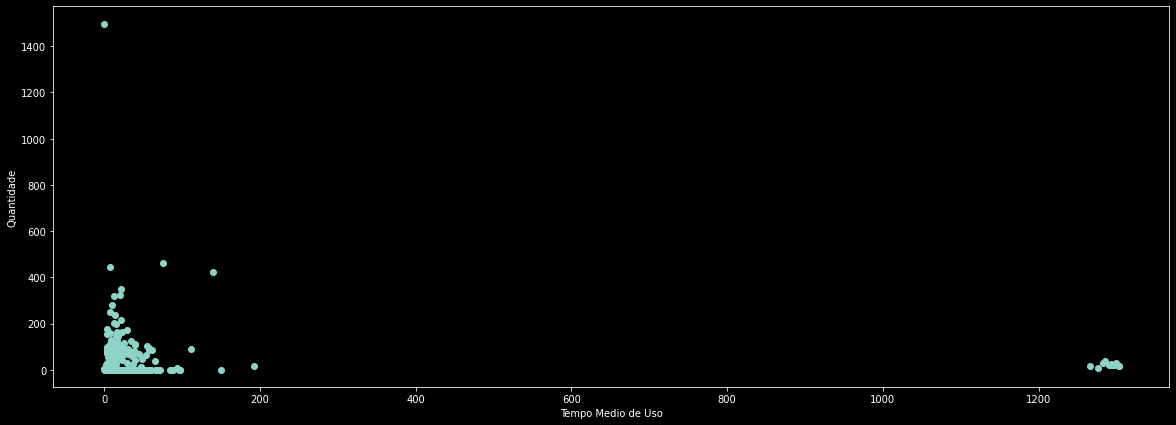

In [6]:
plot_scatter(users.TempoMedio, users.Quantidade, yl='Quantidade',xl='Tempo Medio de Uso')

Dados estão muito concentrados ou muito esparsos. Algumas técnicas de preprocessamento deverão ser utilizadas para melhorar a qualidade dos dados.

In [7]:
users.isnull().sum()

NomeUsuario    0
Login          0
Email          0
NomeEquipe     0
Quantidade     0
TempoMedio     0
dtype: int64

In [8]:
users.isna().sum()

NomeUsuario    0
Login          0
Email          0
NomeEquipe     0
Quantidade     0
TempoMedio     0
dtype: int64

In [9]:
users.describe()

,Quantidade,TempoMedio
count,602.000000,602.000000
mean,23.392027,52.023256
std,80.951470,177.753076
min,1.000000,0.000000
25%,1.000000,16.000000
50%,1.000000,25.000000
75%,3.000000,34.000000
max,1498.000000,1303.000000


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NomeUsuario  602 non-null    object
 1   Login        602 non-null    object
 2   Email        602 non-null    object
 3   NomeEquipe   602 non-null    object
 4   Quantidade   602 non-null    int64 
 5   TempoMedio   602 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 28.3+ KB


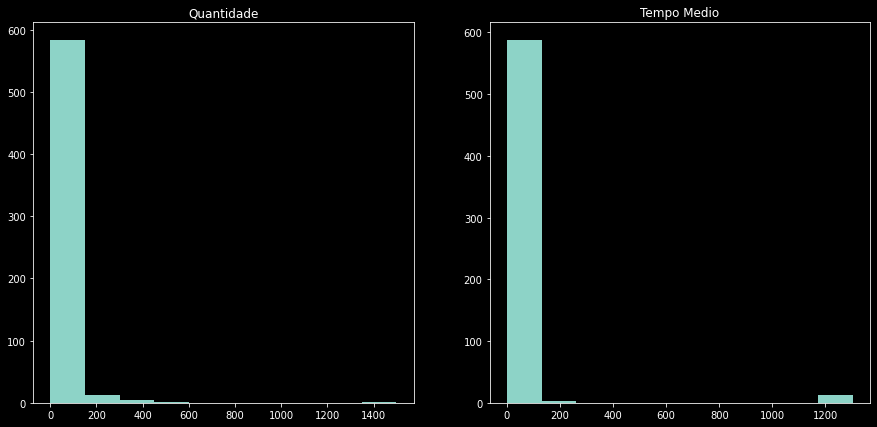

In [11]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((15,7))
ax[0].hist(users.Quantidade)
ax[0].set_title('Quantidade')
ax[1].hist(users.TempoMedio)
ax[1].set_title('Tempo Medio')
plt.show()

Analisando os histogramas acima, concluimos que temos 2 caminhos a seguir:
1. remover os outliers presentes em cada DataSet
2. normalizar ou estandarizar os dados usados

## Remocao de outliers

In [0]:
filtro_quant = users.Quantidade <= users.Quantidade.quantile(0.99)
filtro_temp = users.TempoMedio <= users.TempoMedio.quantile(0.975)
df_filtered = users[filtro_quant & filtro_temp]

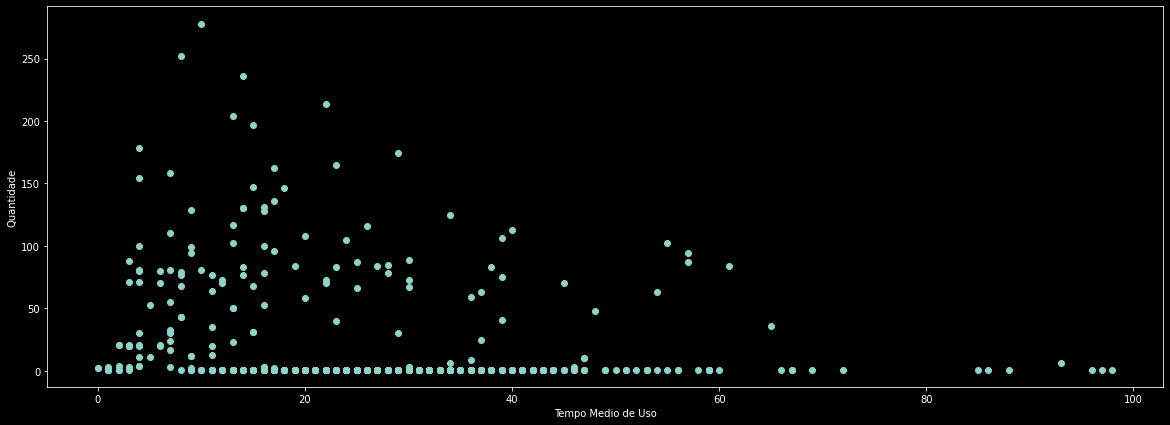

In [13]:
plot_scatter(df_filtered.TempoMedio, df_filtered.Quantidade, xl='Tempo Medio de Uso', yl='Quantidade')

O resultado obtido nao evidencia muito claramente uma tendencia de agrupamento. Vamos terntar standarizar os dados.

In [14]:
# standard scaler
scaler = StandardScaler()
scaler.fit(df_filtered[['Quantidade', 'TempoMedio']])
_ = scaler.transform(df_filtered[['Quantidade', 'TempoMedio']])
df_filtered['Quantidade_Standard'] = _[ :, 0]
df_filtered['TempoMedio_Standard'] = _[ :, 1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


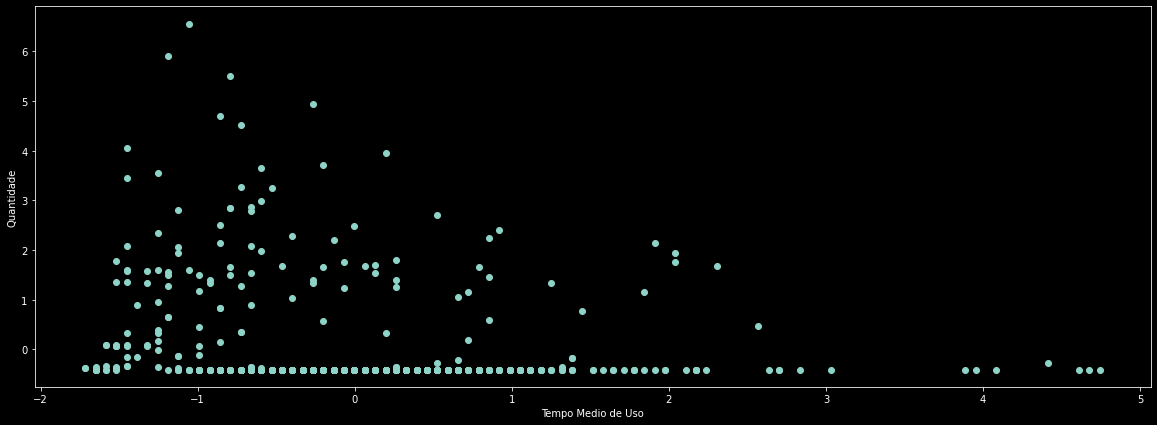

In [15]:
plot_scatter(df_filtered.TempoMedio_Standard, 
             df_filtered.Quantidade_Standard, 
             xl='Tempo Medio de Uso', 
             yl='Quantidade')

## Normalizacao dos dados

In [16]:
normalizer = Normalizer()
normalizer.fit(df_filtered[['Quantidade', 'TempoMedio']])
_ = normalizer.transform(df_filtered[['Quantidade', 'TempoMedio']])
df_filtered['Quantidade_Normalizado'] = _[ :, 0]
df_filtered['TempoMedio_Normalizado'] = _[ :, 1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


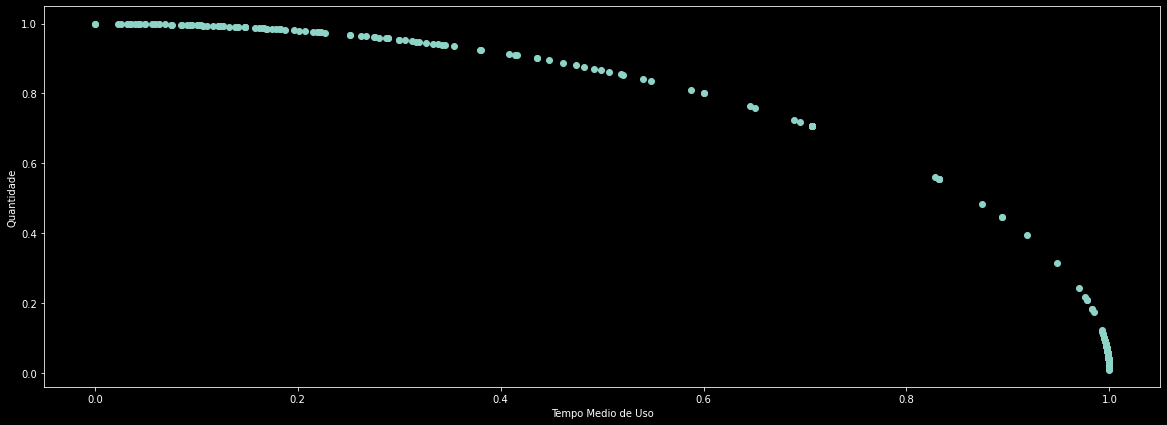

In [17]:
plot_scatter(df_filtered.TempoMedio_Normalizado, 
             df_filtered.Quantidade_Normalizado, 
             xl='Tempo Medio de Uso', 
             yl='Quantidade')

# Plotando Clusters
Remover os outliers e manter cerca de 98% dos daods melhorou a distribuicao do graficio de dispercao. Vamos usar o dataframe filtrado para plotar os clusters do K-Means

In [0]:
def plot_inertia(r, df):
    inertias = []
    clusters = [i + 1 for i in range(r)]
    for x in clusters:
        kmeans = KMeans(n_clusters=x)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)
    plt.figure(figsize=(12,7))
    plt.plot(clusters, inertias)
    plt.xlabel('Clusters')
    plt.ylabel('Inertias')
    plt.title('Elbow Analysis')
    plt.show()

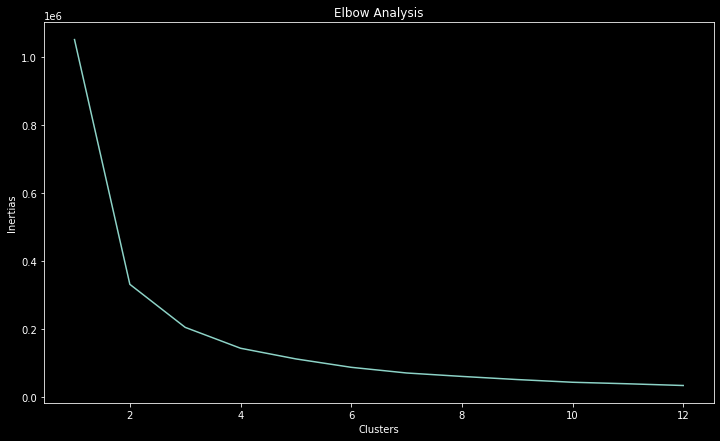

In [19]:
plot_inertia(12, df_filtered[['Quantidade', 'TempoMedio']])

In [0]:
def plot_kmeans(df, clusters):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(df[['Quantidade', 'TempoMedio']])
    plot_scatter(
            df.TempoMedio,
            df.Quantidade,
            kmeans.labels_,
            'Quantidade',
            'Tempo Medio de Uso',
            'Clusters with K-Means - {} clusters'.format(clusters))

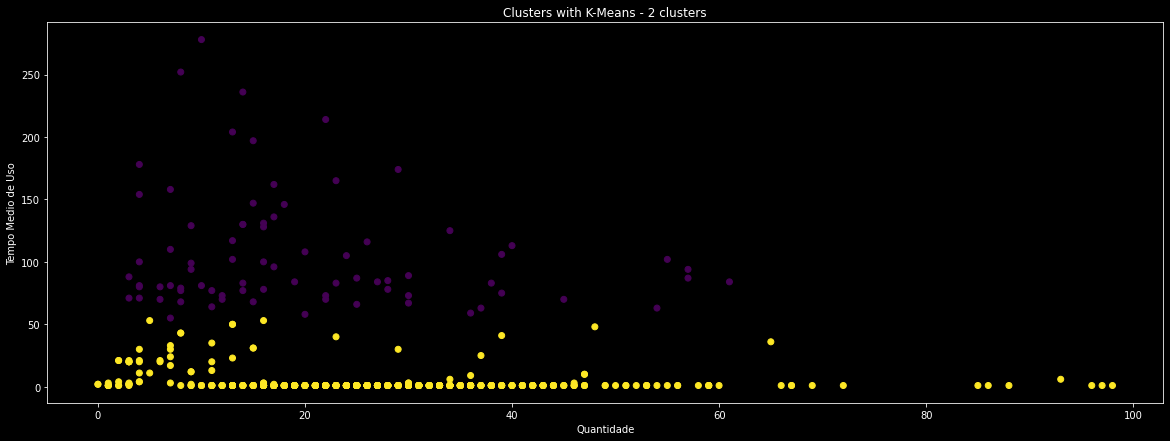

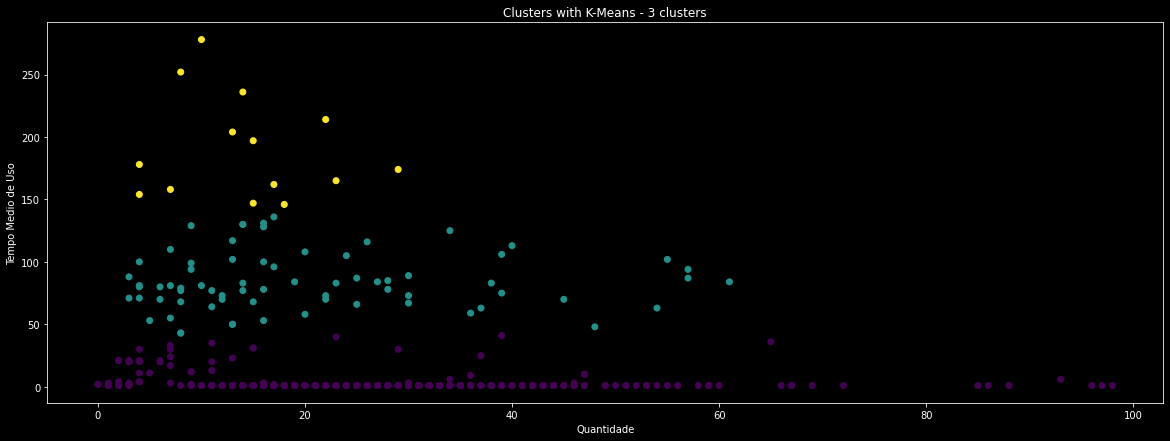

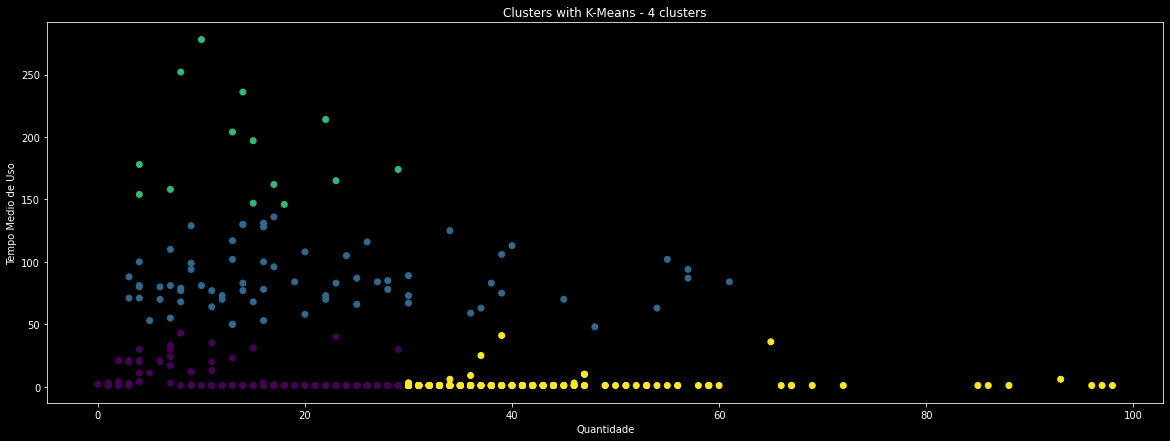

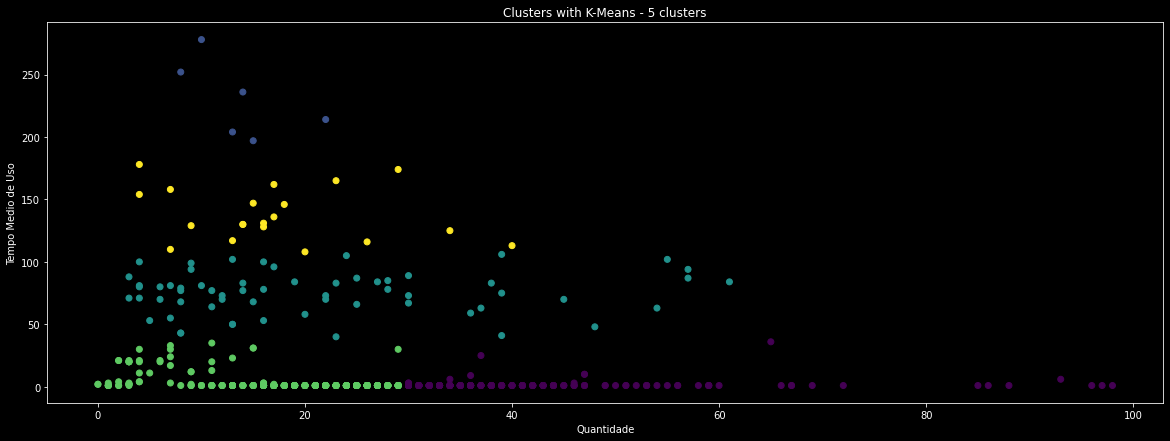

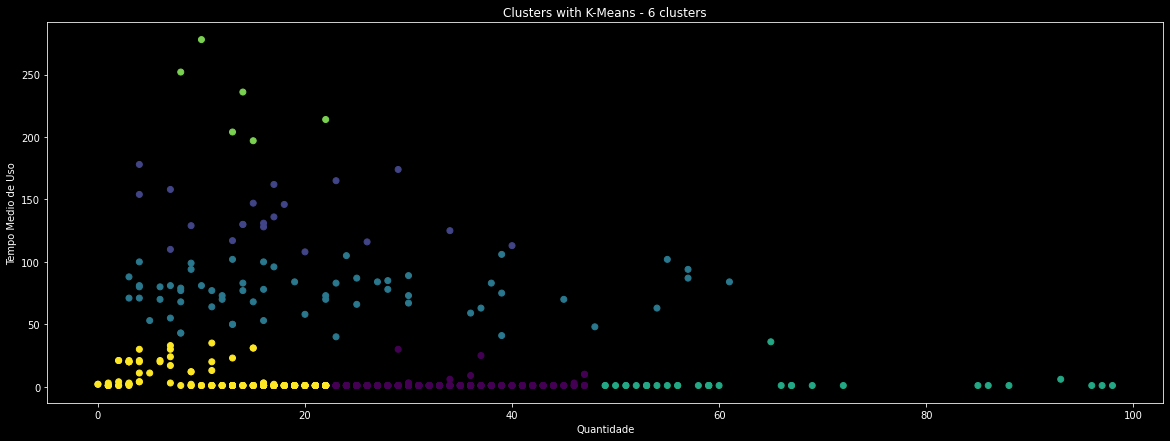

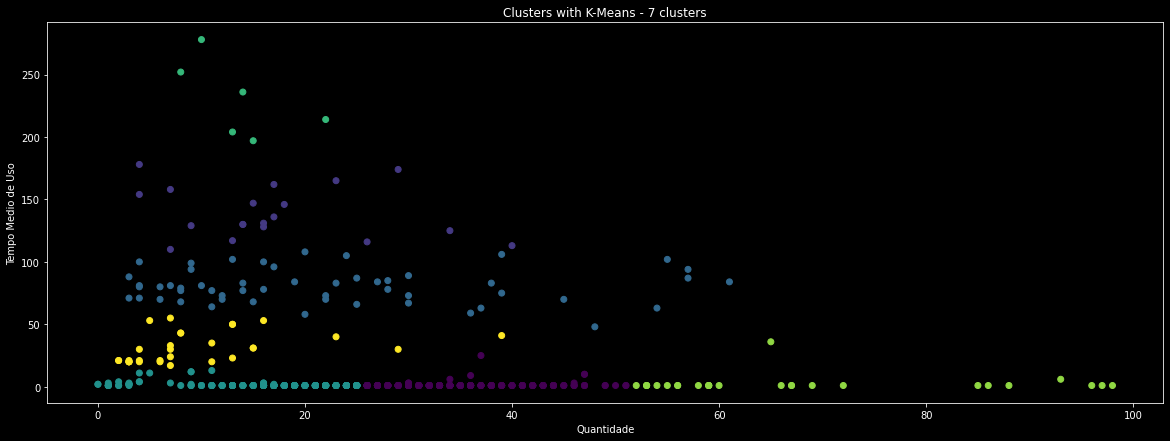

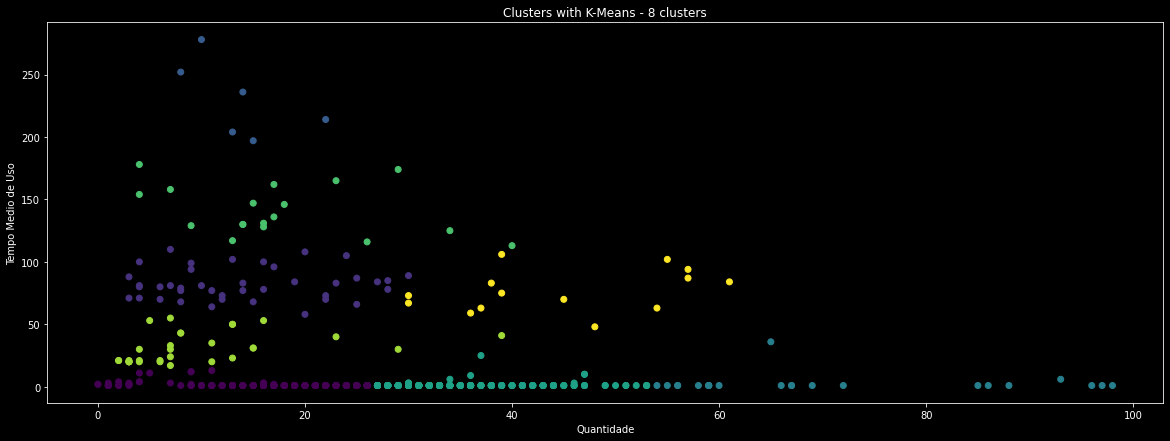

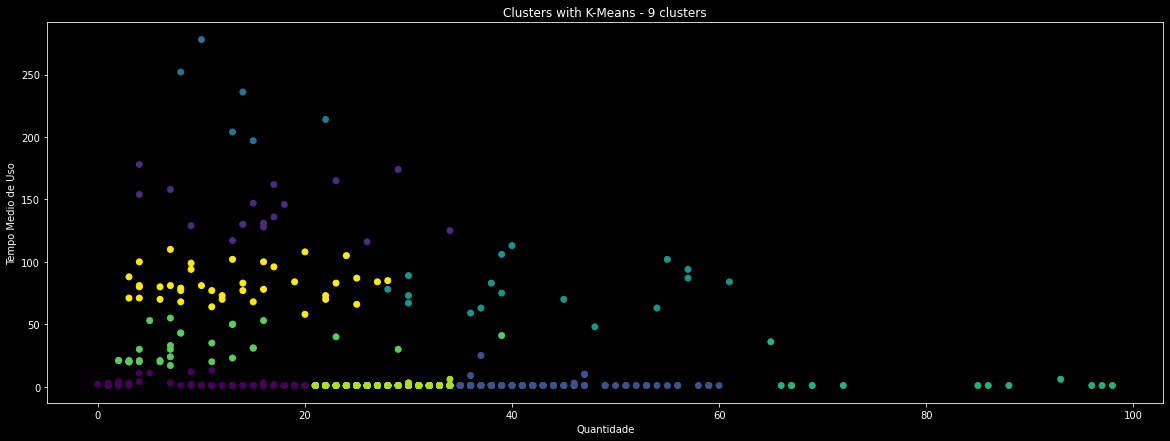

In [21]:
for i in range(2,10):
    plot_kmeans(df_filtered, i)

## Clusterizacao com DBSCAN

In [0]:
def plot_dbscan(df, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(df[['Quantidade', 'TempoMedio']])
    plot_scatter(
            df.TempoMedio_Standard,
            df.Quantidade_Standard,
            dbscan.labels_,
            'Quantidade',
            'Tempo Medio de Uso',
            'Clusters com DBSCAN - {} labels - {} samples - {} eps'.format(len(set(dbscan.labels_)), min_samples, eps))
    return dbscan

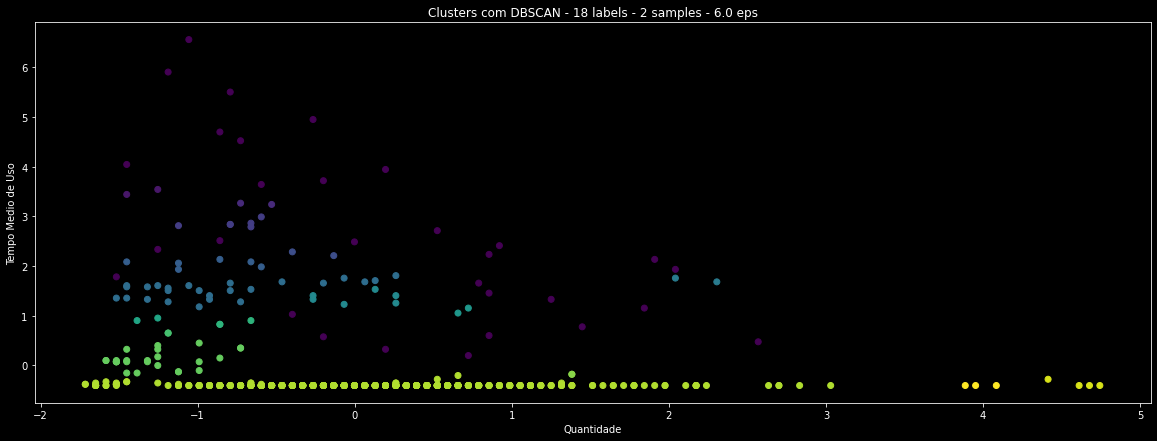

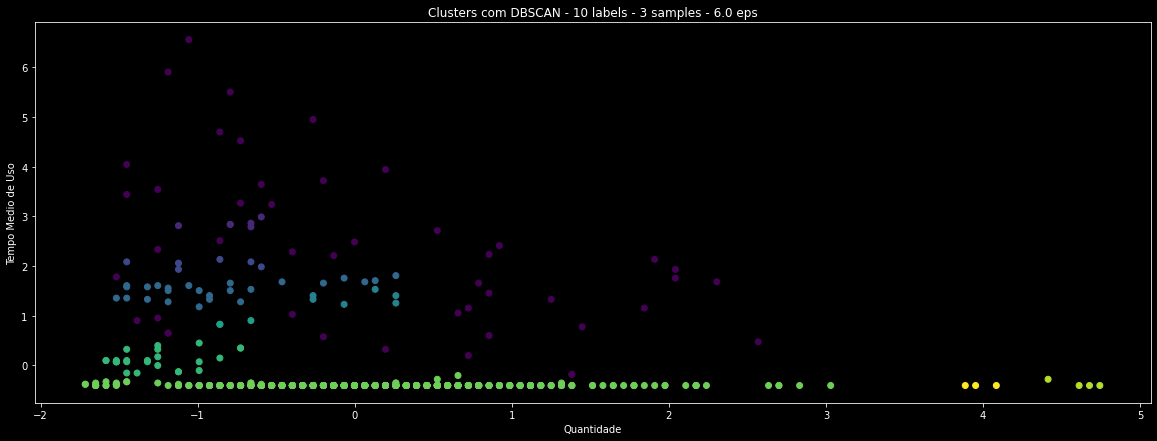

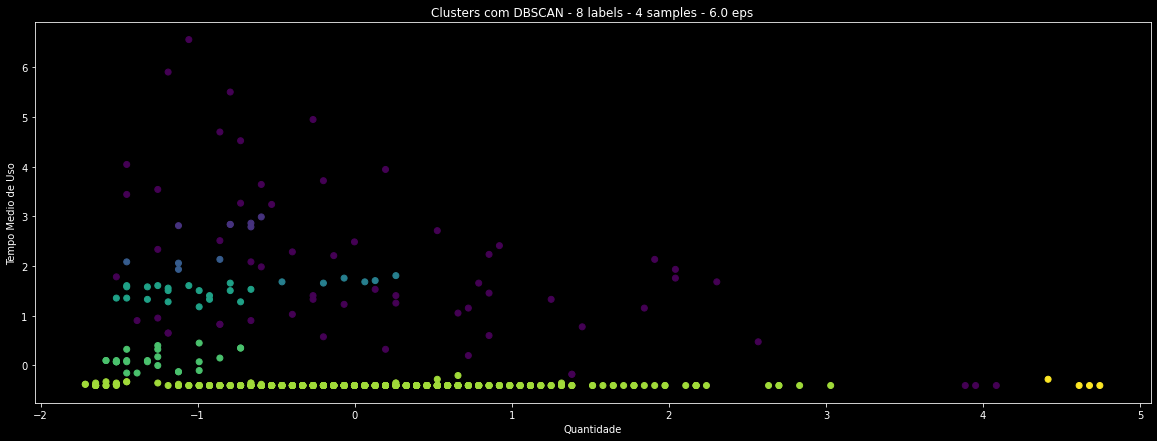

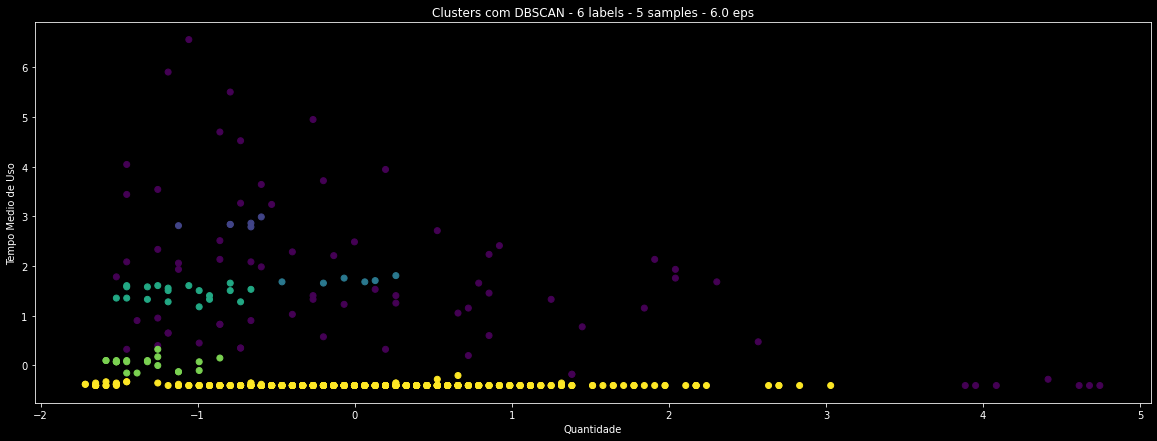

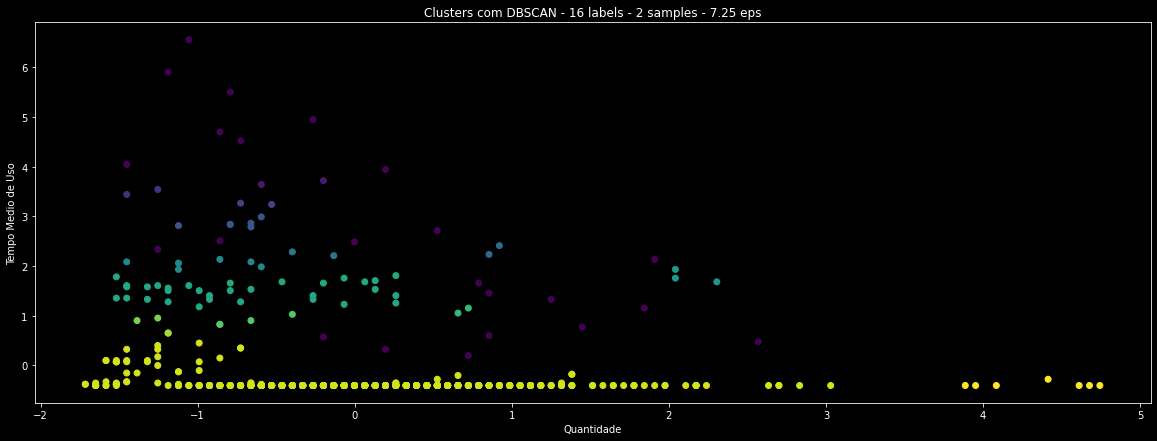

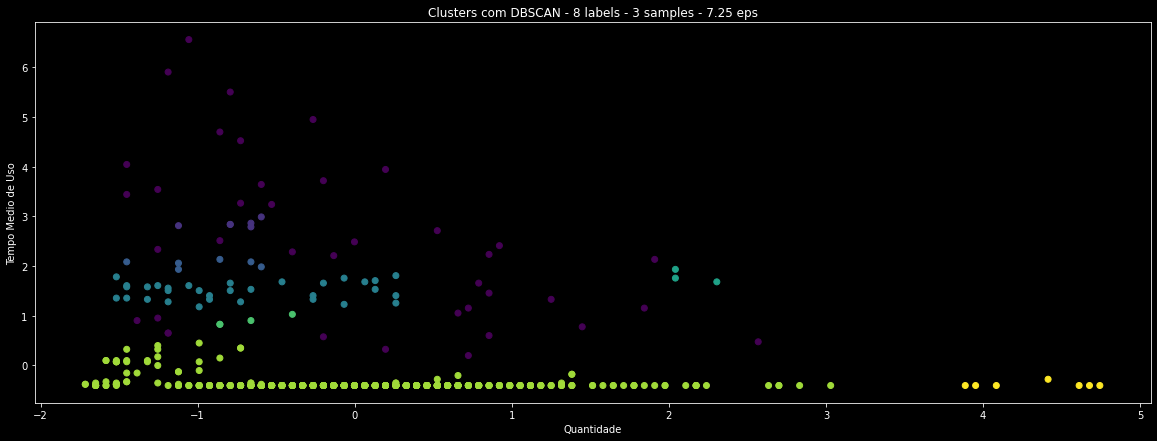

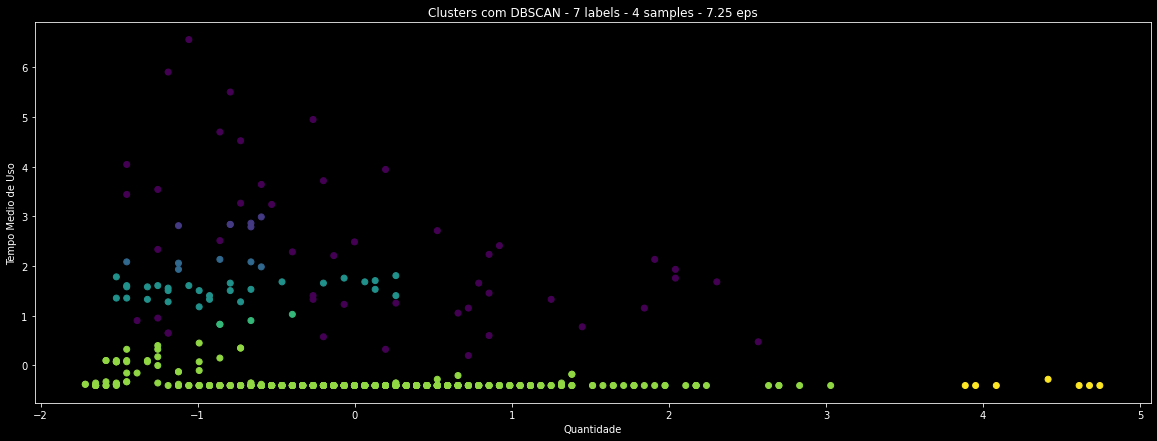

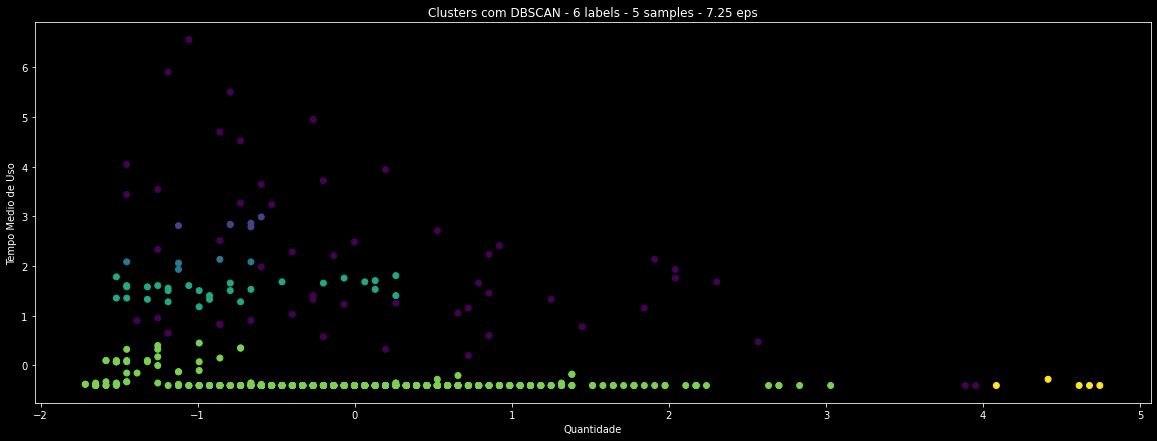

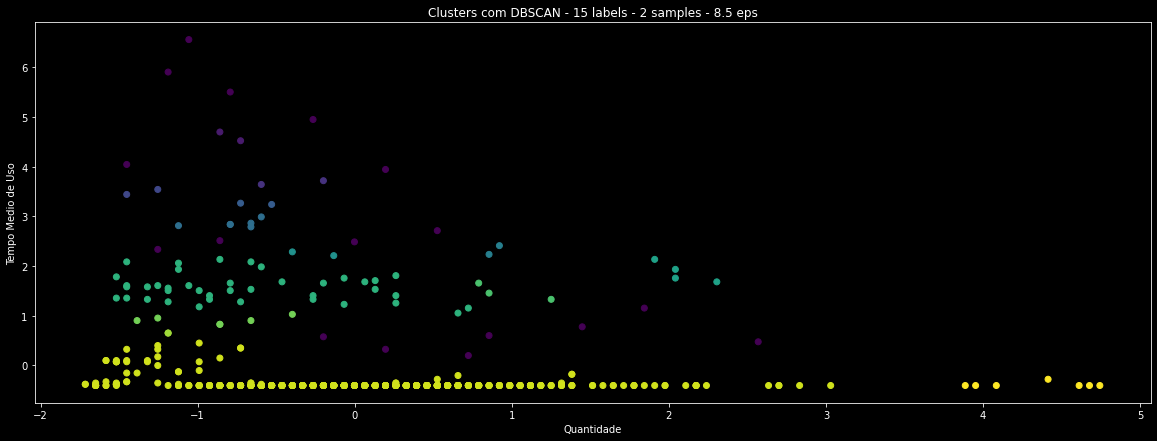

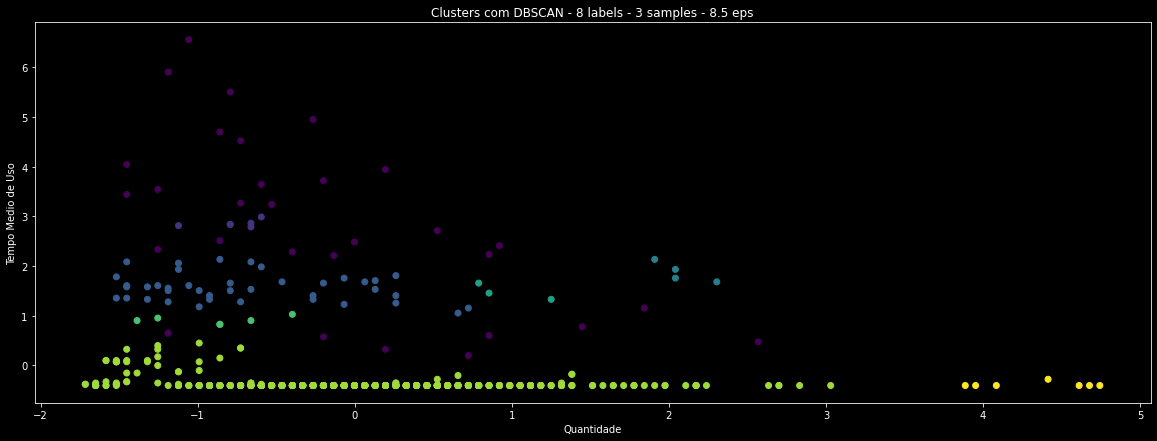

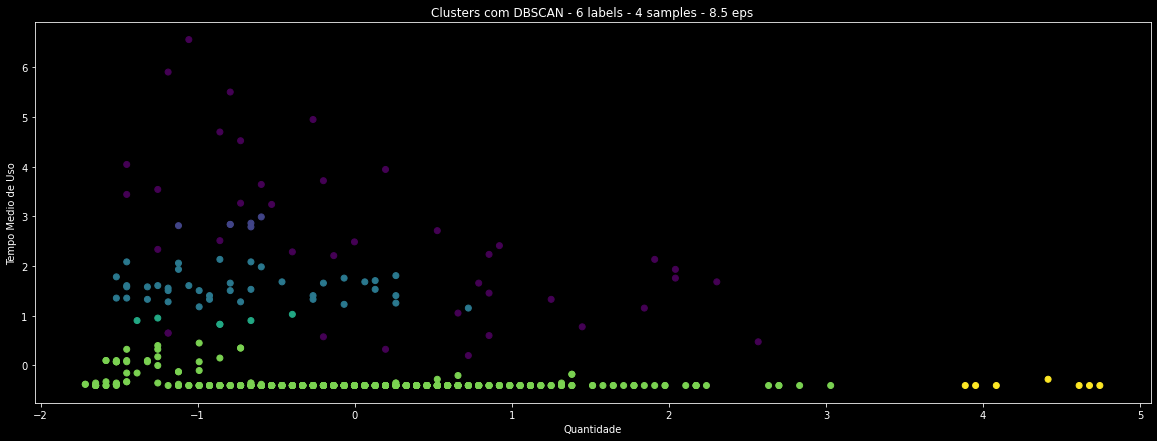

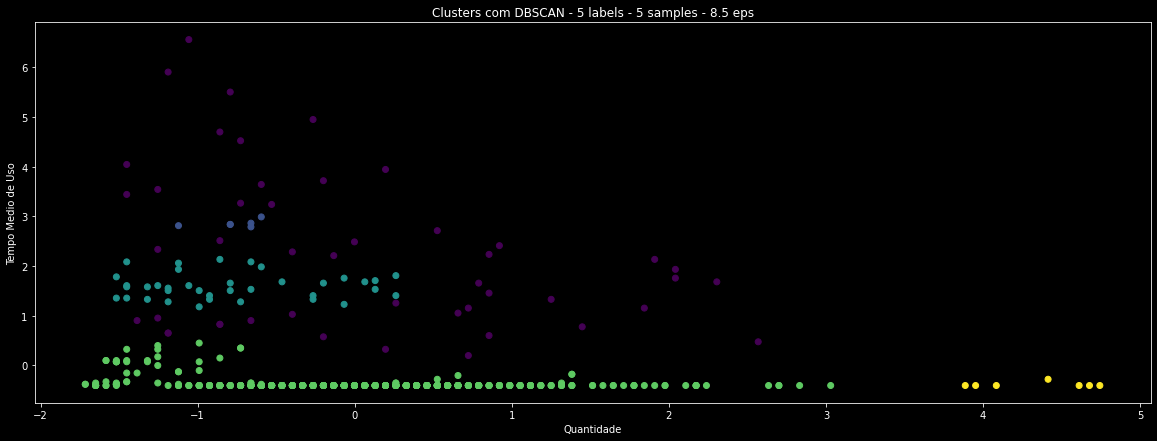

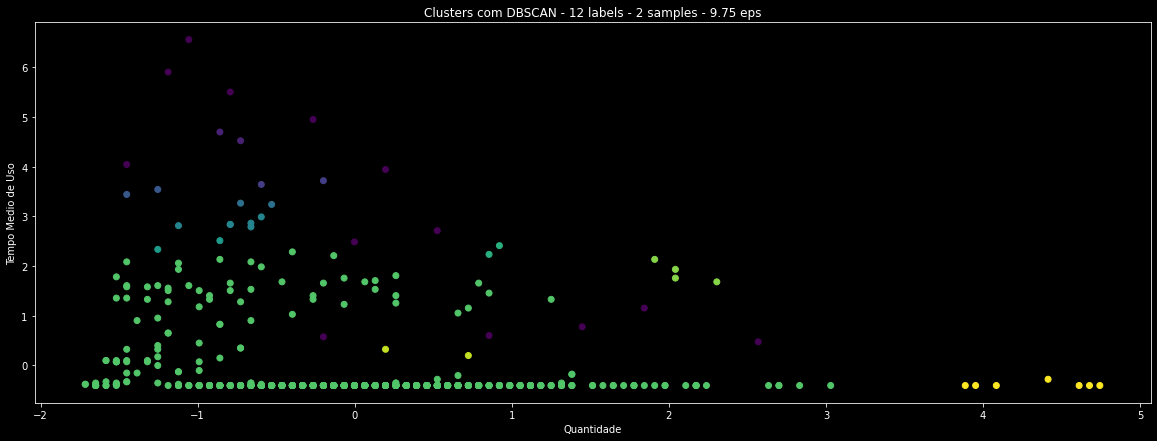

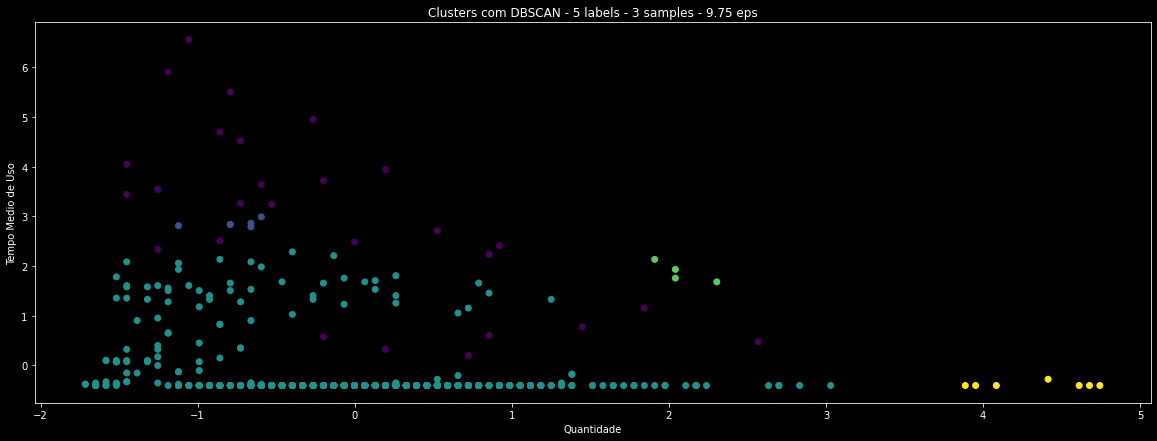

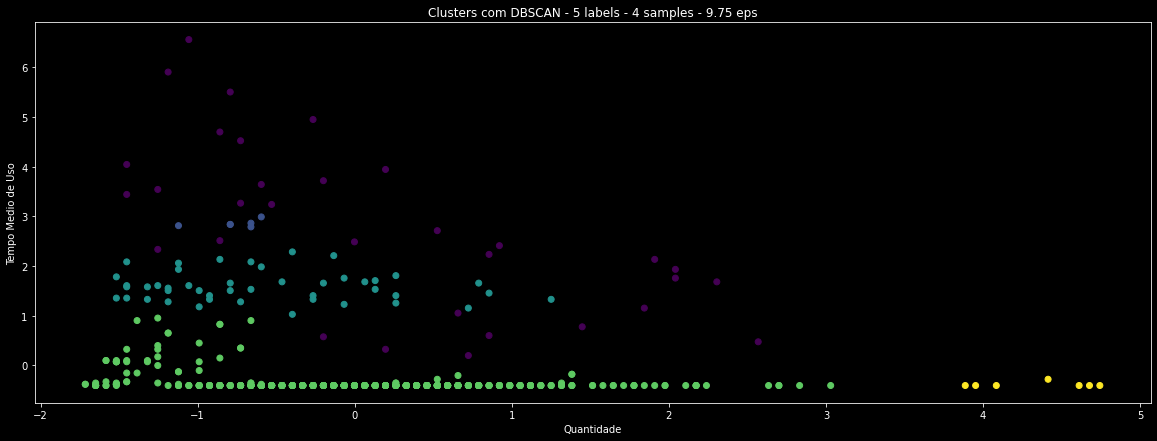

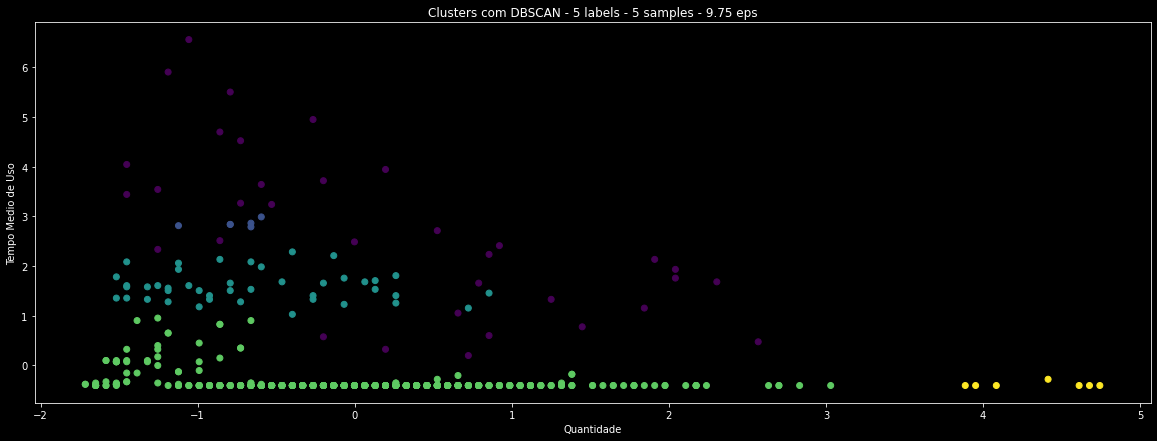

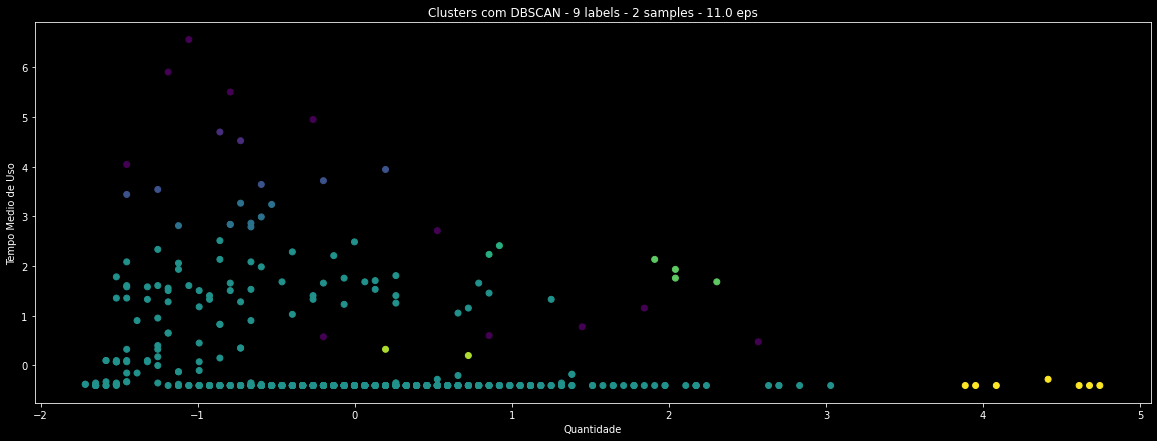

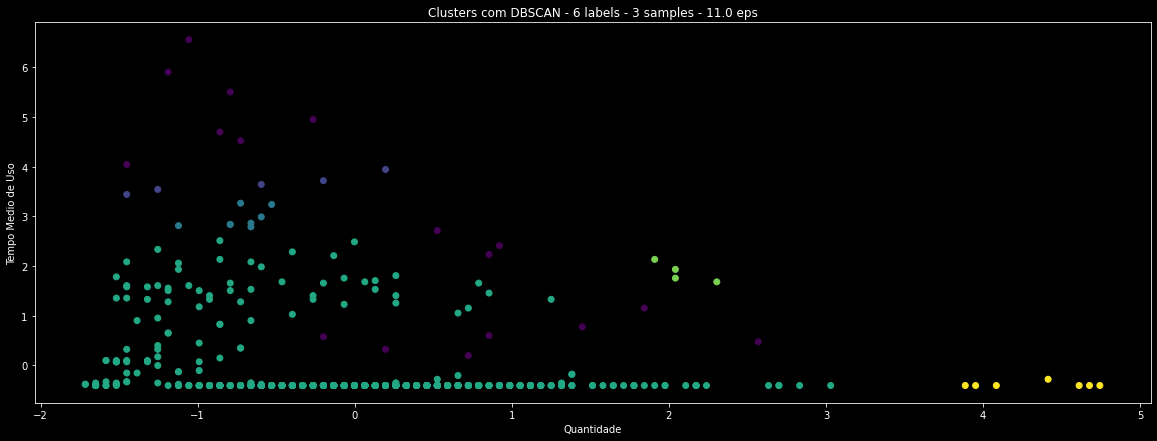

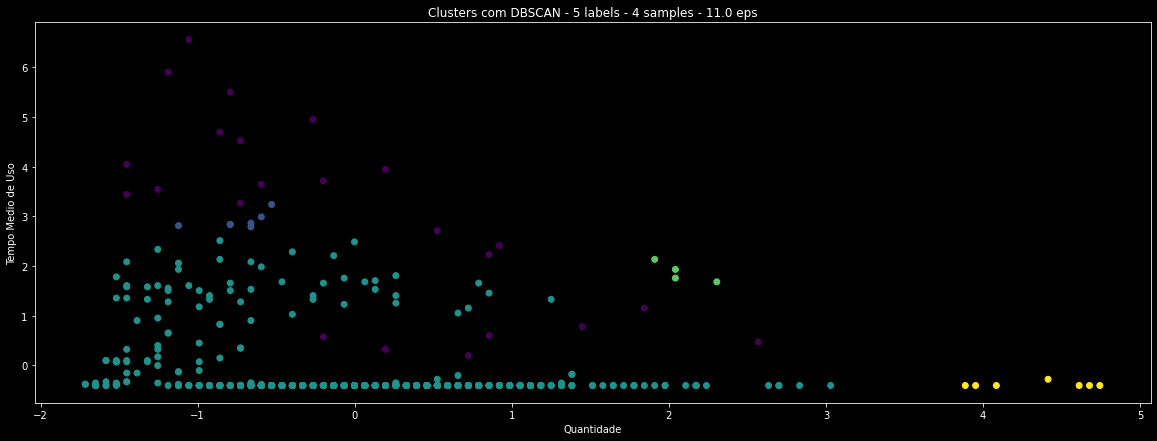

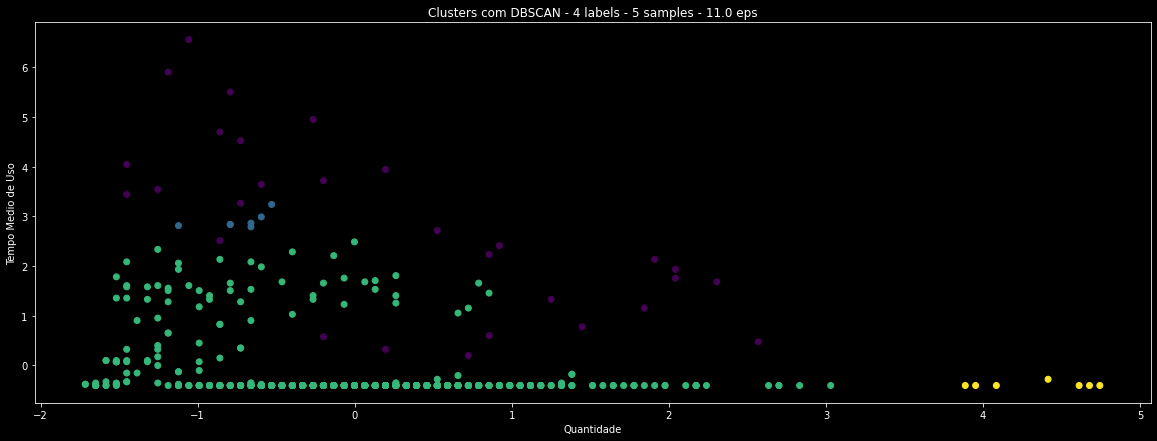

In [23]:
for i in np.linspace(6, 11, 5):
    for j in range(2, 6):
        b = plot_dbscan(df_filtered, i, j)

## Respostas
Apos fazer a analise acima concluimos:
1. Os clusters representam grupos de agrupamento, no caso do K-Means, usando a media da distancia de um ponto para outro, no caso do DBSCAN, 'escaneando' a proximidade dos pontos com base no raio da distancia de um ponto para outro. Esta tecnica permite descobrir padroes de agrupamento que podem orientar uma segmentacao ou estratificacao no nosso dataset.
2. Usando o K-Means e o metodo do cotovelo, descobrimos que o numero ideal de clusters seria 3 ou 4. Usando DBSCAn, a orientacao seria manter entre 4 ou 5 clusters.
3. Para este caso em que temos outliers e o core do dataset esta muito concentrado no tempo medio = 1 e grande amplitude de queantidade, o K-Means parece ser a melhor abordagem por permitir visualizar uma boa estratificacao sobre o eixo y quando se consideram apenas 3 clusters.